Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Uploading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/datasets/insurance.csv

/content/drive/MyDrive/datasets/insurance.csv


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets/insurance.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


The dataset contains information on insurance claims and related factors. Here's an overview:

Total Entries: 1,338 rows.
Columns (13 total):


age: Age of the policyholder (some missing values).

sex: Gender of the policyholder (male or female).

bmi: Body Mass Index of the policyholder (some missing values).

children: Number of children/dependents covered by the insurance (some missing values).

smoker: Indicates if the policyholder is a smoker (yes or no).

Claim_Amount: The amount claimed (some missing values).

past_consultations: Number of past medical consultations (some missing values).

num_of_steps: Number of steps taken (possibly daily or tracked over a period) (some missing values).

Hospital_expenditure: Amount spent on hospital care (some missing values).

NUmber_of_past_hospitalizations: Number of past hospitalizations (some missing values).

Anual_Salary: Annual salary of the policyholder (some missing values).

region: Geographic region of the policyholder (southeast, etc.).

charges: Insurance charges.

The dataset includes both categorical (e.g., sex, smoker, region) and numerical data (e.g., age, bmi, Claim_Amount).

In [ ]:
data.shape

(1338, 13)

In [ ]:
data.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
Claim_Amount,float64
past_consultations,float64
num_of_steps,float64
Hospital_expenditure,float64
NUmber_of_past_hospitalizations,float64


In [ ]:
data.nunique()

,0
age,47
sex,2
bmi,547
children,6
smoker,2
Claim_Amount,1324
past_consultations,39
num_of_steps,1335
Hospital_expenditure,1334
NUmber_of_past_hospitalizations,4


In [ ]:
print(data['sex'].unique())
print(data['children'].unique())
print(data['smoker'].unique())
print(data['region'].unique())
print(data['NUmber_of_past_hospitalizations'].unique())

['male' 'female']
[ 0.  1.  2.  3.  4.  5. nan]
['no' 'yes']
['southeast' 'southwest' 'northwest' 'northeast']
[ 0. nan  1.  2.  3.]


In [ ]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
data.isnull().sum().sort_values(ascending = False)

,0
Claim_Amount,14
age,9
past_consultations,6
Anual_Salary,6
children,5
Hospital_expenditure,4
bmi,3
num_of_steps,3
NUmber_of_past_hospitalizations,2
sex,0


Removing the Null Values from the Claim_Amount Column

In [ ]:
data['Claim_Amount'] = data['Claim_Amount'].fillna(data['Claim_Amount'].mean())

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
age                                9
past_consultations                 6
Anual_Salary                       6
children                           5
Hospital_expenditure               4
bmi                                3
num_of_steps                       3
NUmber_of_past_hospitalizations    2
sex                                0
smoker                             0
Claim_Amount                       0
region                             0
charges                            0
dtype: int64


Removing Null Values from the age Column


In [ ]:
data['age'] = data['age'].fillna(int(data['age'].mean()))

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
past_consultations                 6
Anual_Salary                       6
children                           5
Hospital_expenditure               4
bmi                                3
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
smoker                             0
Claim_Amount                       0
region                             0
charges                            0
dtype: int64


Removing Null Values from the past_consultations Column


In [ ]:
data['past_consultations'] = data['past_consultations'].fillna(round(data['past_consultations'].mean()))

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Anual_Salary                       6
children                           5
Hospital_expenditure               4
bmi                                3
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
smoker                             0
Claim_Amount                       0
past_consultations                 0
region                             0
charges                            0
dtype: int64


Removing Null Values from the annual salary Column


In [ ]:
data['Anual_Salary'] = data['Anual_Salary'].fillna(data['Anual_Salary'].mean())

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
children                           5
Hospital_expenditure               4
bmi                                3
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
smoker                             0
Claim_Amount                       0
past_consultations                 0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


Removing null values from children column

In [ ]:
data['children'] = data['children'].fillna(data['children'].mode()[0])

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Hospital_expenditure               4
bmi                                3
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


Removing the Null Values from the Hospital_expenditure Column

In [ ]:
data['Hospital_expenditure'] = data['Hospital_expenditure'].fillna(data['Hospital_expenditure'].mean())

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
bmi                                3
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
Hospital_expenditure               0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


Removing Null Values from the bmi Column

In [ ]:
data['bmi'] = data['bmi'].fillna(round(data['bmi'].mean(),3))

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
Hospital_expenditure               0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


Removing the Null Values from the num_of_steps Column

In [ ]:
data['num_of_steps'] = data['num_of_steps'].fillna(round(data['num_of_steps'].mean()))

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


Removing the Null Values from the Number_of_past_hospitalizations Column

In [ ]:
data['NUmber_of_past_hospitalizations'] = data['NUmber_of_past_hospitalizations'].fillna(data['NUmber_of_past_hospitalizations'].mode()[0])

In [ ]:
data.rename(columns={'NUmber_of_past_hospitalizations': 'Number_of_past_hospitalizations'}, inplace=True)

In [ ]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
Number_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   Number_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

Checking Outliers

In [ ]:
col_name = list(data.columns)
col_name

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'Number_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

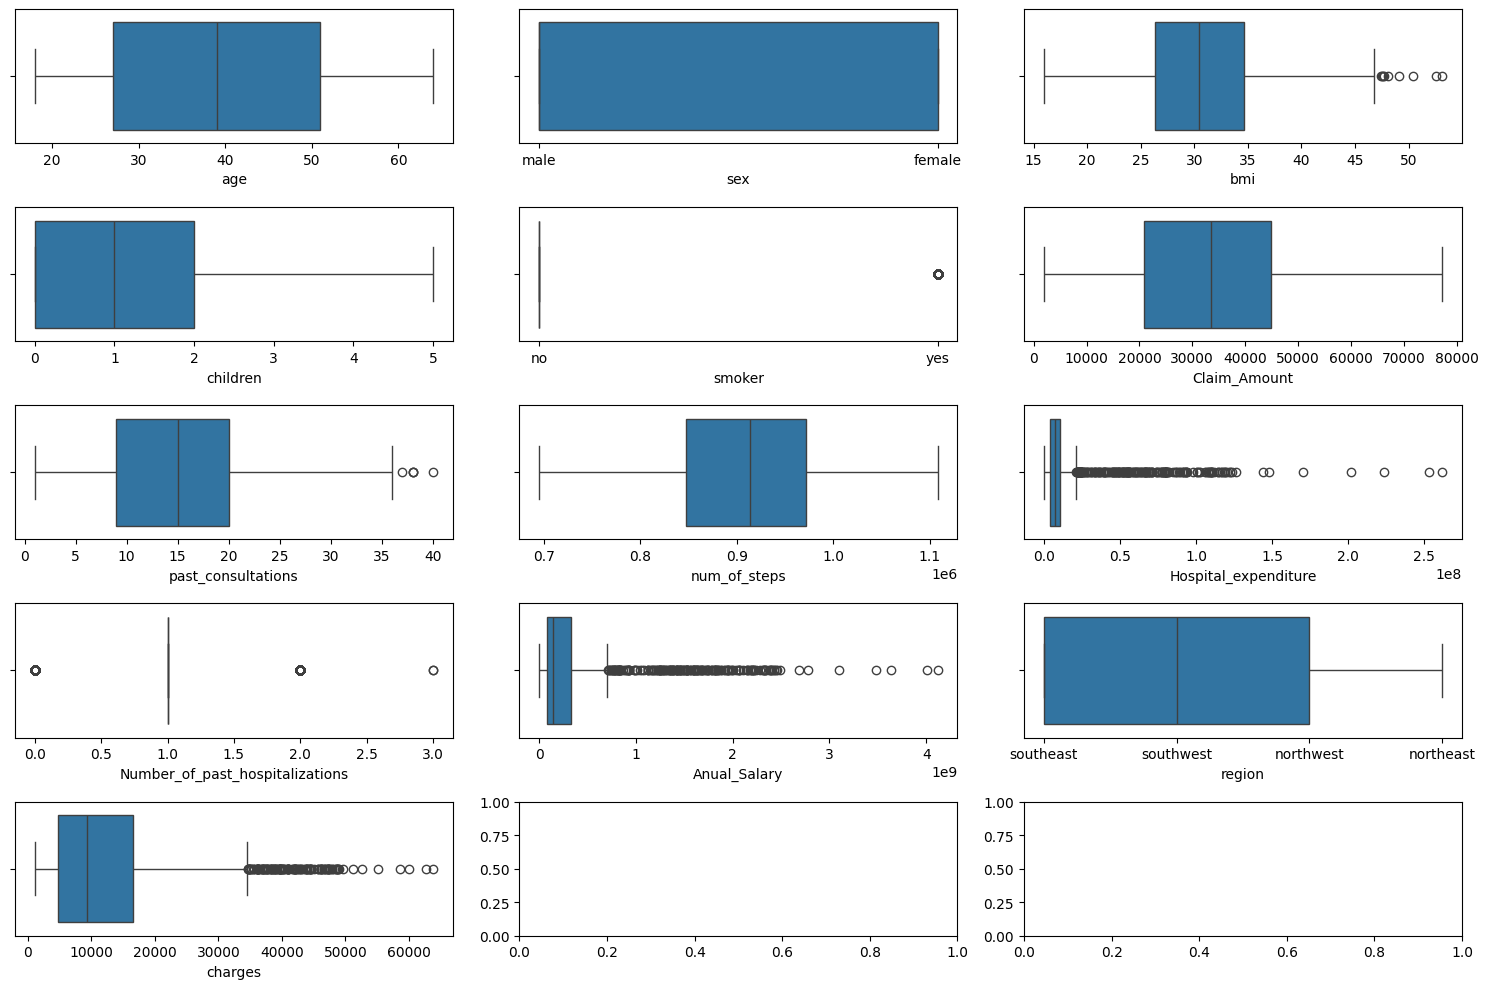

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 10))
axes = axes.flatten()

for i, column in enumerate(col_name):
  sns.boxplot(x = data[column], ax = axes[i])

plt.tight_layout()
plt.show()

This series of boxplots provide a visual summary of the distribution, central tendency, and variability of the data, as well as highlighting any potential outliers.

 Here’s a breakdown of each plot:

**Age**: The age distribution is roughly symmetrical, with a median around 40 years. The range extends from about 18 to 64 years, with** no significant outliers**.

**Sex**: This is likely a categorical distribution showing counts rather than a boxplot. It indicates the dataset contains both males and females, likely with **similar representation**.

**BMI (Body Mass Index)**: BMI values range from around 15 to 50. The median is approximately 30, suggesting the majority of policyholders are in the overweight category. There are a** few high outliers above 45.**

**Children**: The number of children ranges from 0 to 5, with most people having between 0 and 2 children. **No extreme outliers are observed.**

**Smoker**: This plot shows two categories (yes or no). The majority of individuals are non-smokers, with **smokers being a minority, potentially highlighted as outliers.**

**Claim_Amount**: Claim amounts range widely, with most claims under 40,000. Some claims are much higher, reaching close to 80,000, marked as** outliers.**

**Past_consultations:** The number of past consultations is mostly between 0 and 20, with a few people having a higher number of consultations, reaching around 40.

**Num_of_steps:** This plot indicates the number of steps, likely on a daily or average basis. Most values are clustered around 700,000 to 1,000,000, with a **few outliers.**

**Hospital_expenditure:** The hospital expenditure has a broad range, with most values under 100,000, but there are **significant outliers**, going up to 250,000 or more, indicating high medical costs for some.

**Number_of_past_hospitalizations:** Most people have few hospitalizations (0 or 1), with a few having up to 3, showing as **outliers.**

**Annual_Salary:** Salaries show a wide range, with the majority under 1,000,000 but** some outliers** reaching up to 4,000,000, indicating a large disparity in income.

**Region:** This categorical variable shows the distribution of policyholders across four regions (southeast, southwest, northwest, northeast), wit**h no apparent skew or outliers.**

**Charges:** Insurance charges are mostly below 15,000, with** some outliers** reaching up to 60,000, highlighting individuals with higher associated costs.

Overall, these boxplots provide insights into the distribution and spread of various factors, highlighting key patterns like the prevalence of non-smokers, common BMI ranges, hospital expenditure, and insurance charges. The outliers indicate cases of extreme values, which could be investigated further for deeper insights.

Treatment of Outliers through IQR Method

In [ ]:
data.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
Claim_Amount,float64
past_consultations,float64
num_of_steps,float64
Hospital_expenditure,float64
Number_of_past_hospitalizations,float64


In [ ]:
numeric_col = data.select_dtypes(include=['number']).drop(columns=['Number_of_past_hospitalizations'])
numeric_col.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,charges
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,55784970.05,1121.8739
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,13700885.19,1131.5066
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,73523107.27,1135.9407
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,75819679.60,1136.3994
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,23012320.01,1137.0110


In [ ]:
Q1 = numeric_col.quantile(0.25)
Q3 = numeric_col.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

age                     2.400000e+01
bmi                     8.341250e+00
children                2.000000e+00
Claim_Amount            2.403123e+04
past_consultations      1.100000e+01
num_of_steps            1.240202e+05
Hospital_expenditure    6.816929e+06
Anual_Salary            2.523204e+08
charges                 1.189963e+04
dtype: float64


In [ ]:
lower_bound = numeric_col.quantile(0.25) - 1.5 * IQR
upper_bound = numeric_col.quantile(0.75) + 1.5 * IQR

In [ ]:
data_no_outliers = numeric_col[~((numeric_col < lower_bound) | (numeric_col > upper_bound)).any(axis=1)]
data_no_outliers.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,charges
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,55784970.05,1121.8739
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,13700885.19,1131.5066
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,73523107.27,1135.9407
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,75819679.60,1136.3994
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,23012320.01,1137.0110


In [ ]:
data_no_outliers.shape

(1126, 9)

In [ ]:
data_no_outliers.isnull().sum().sort_values(ascending = False
                                            )

,0
age,0
bmi,0
children,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
Anual_Salary,0
charges,0


In [ ]:
data = pd.concat([data_no_outliers, data[['sex', 'smoker', 'region', 'Number_of_past_hospitalizations']]], axis=1)

In [ ]:
data.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,charges,sex,smoker,region,Number_of_past_hospitalizations
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,55784970.05,1121.8739,male,no,southeast,0.0
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,13700885.19,1131.5066,male,no,southeast,0.0
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,73523107.27,1135.9407,male,no,southeast,0.0
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,75819679.60,1136.3994,male,no,southeast,0.0
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,23012320.01,1137.0110,male,no,southeast,0.0


In [ ]:
data.isnull().sum().sort_values(ascending = False)

,0
age,212
bmi,212
children,212
Claim_Amount,212
past_consultations,212
num_of_steps,212
Hospital_expenditure,212
Anual_Salary,212
charges,212
sex,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(1126, 13)

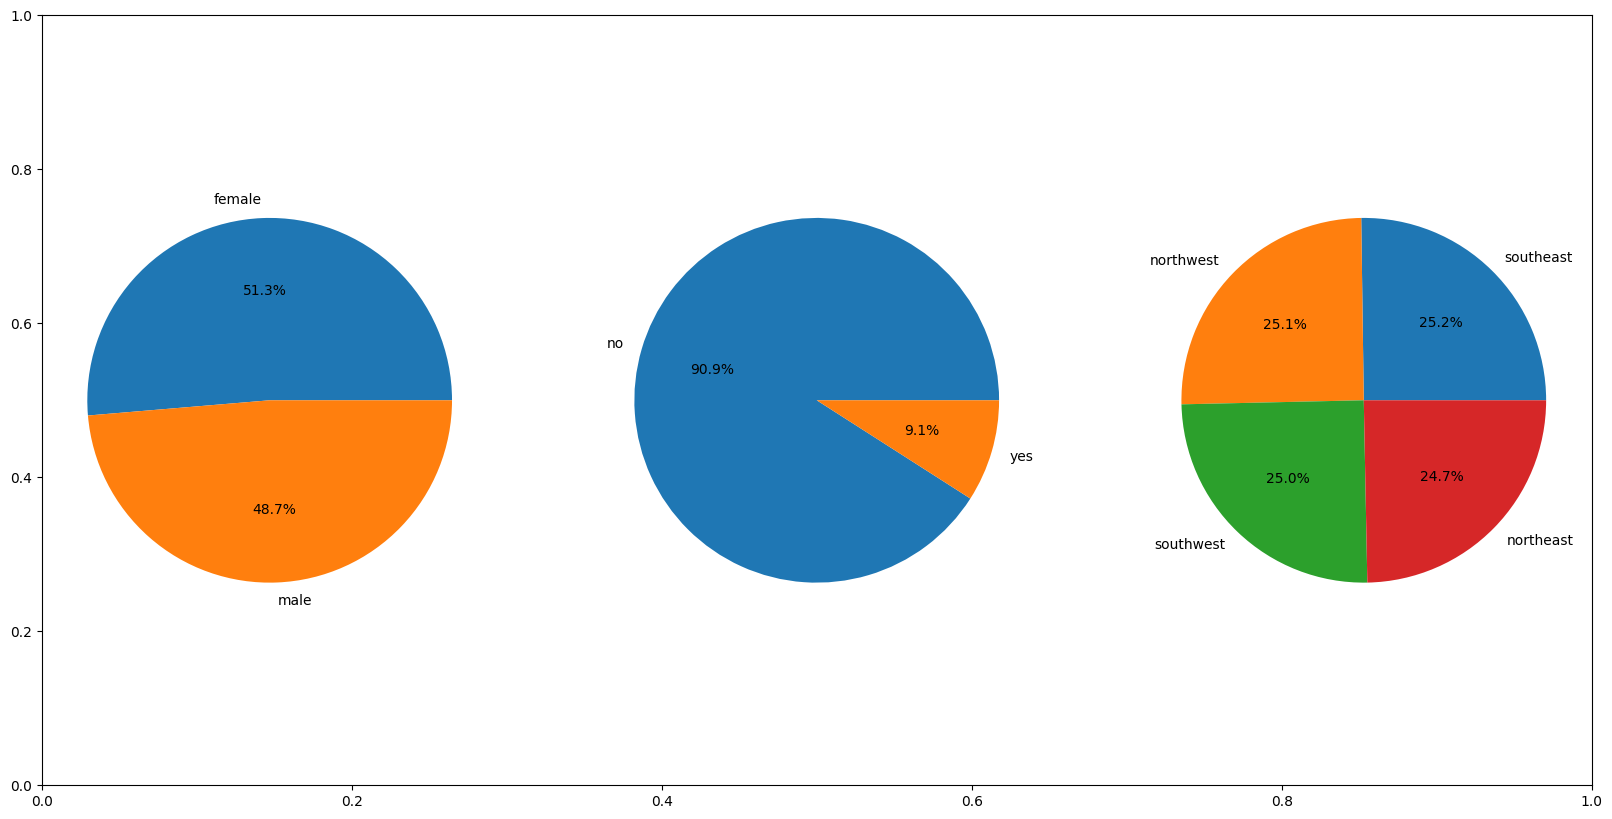

In [ ]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

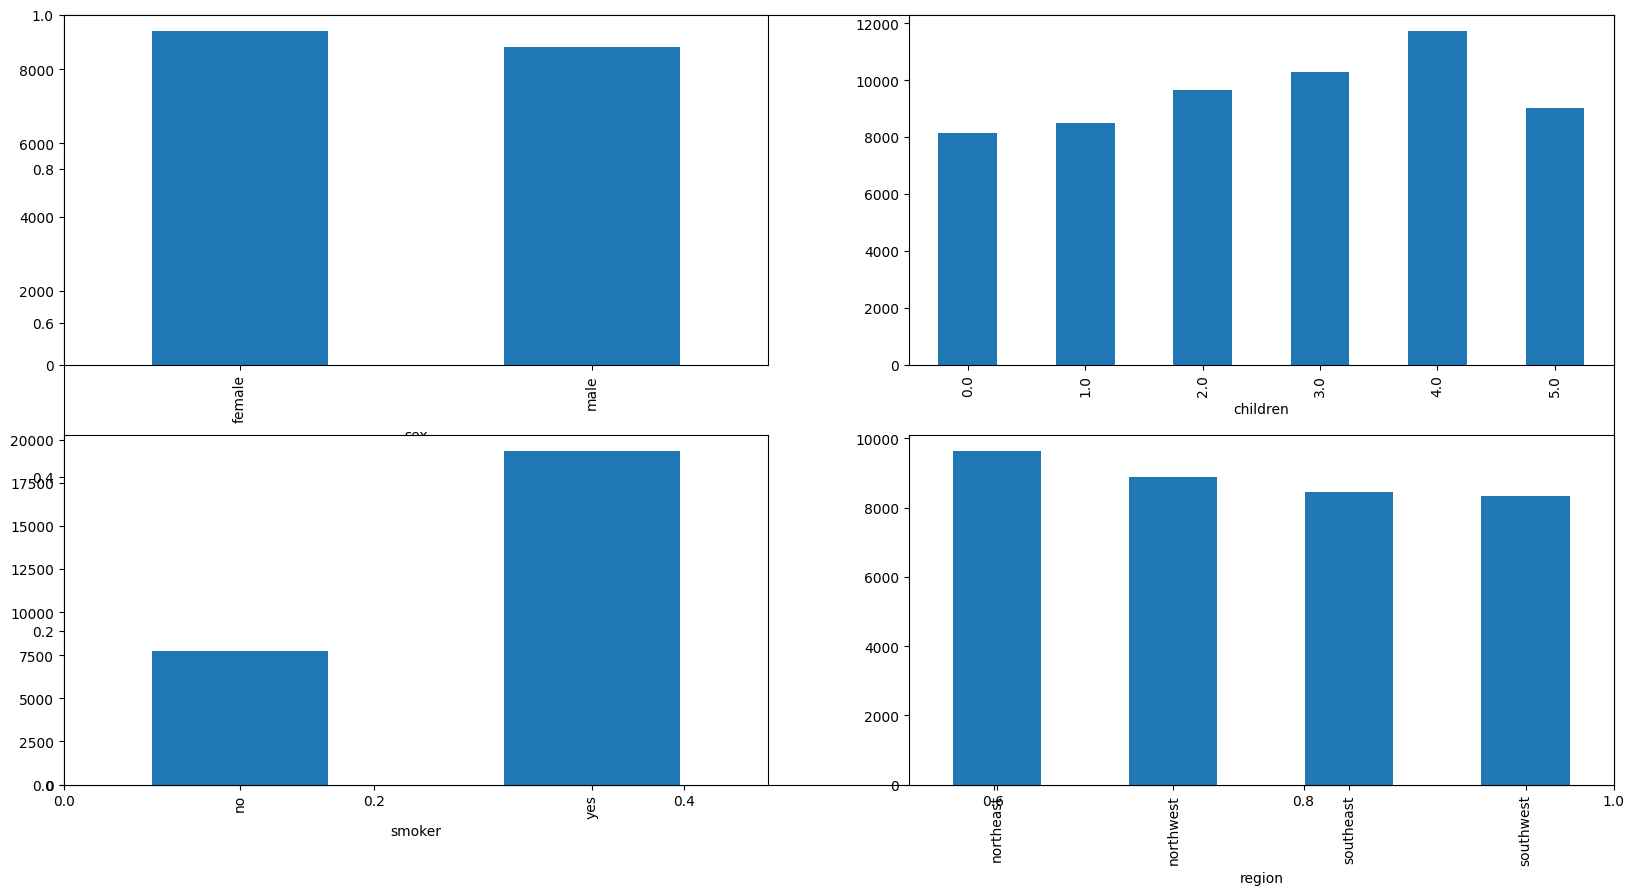

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

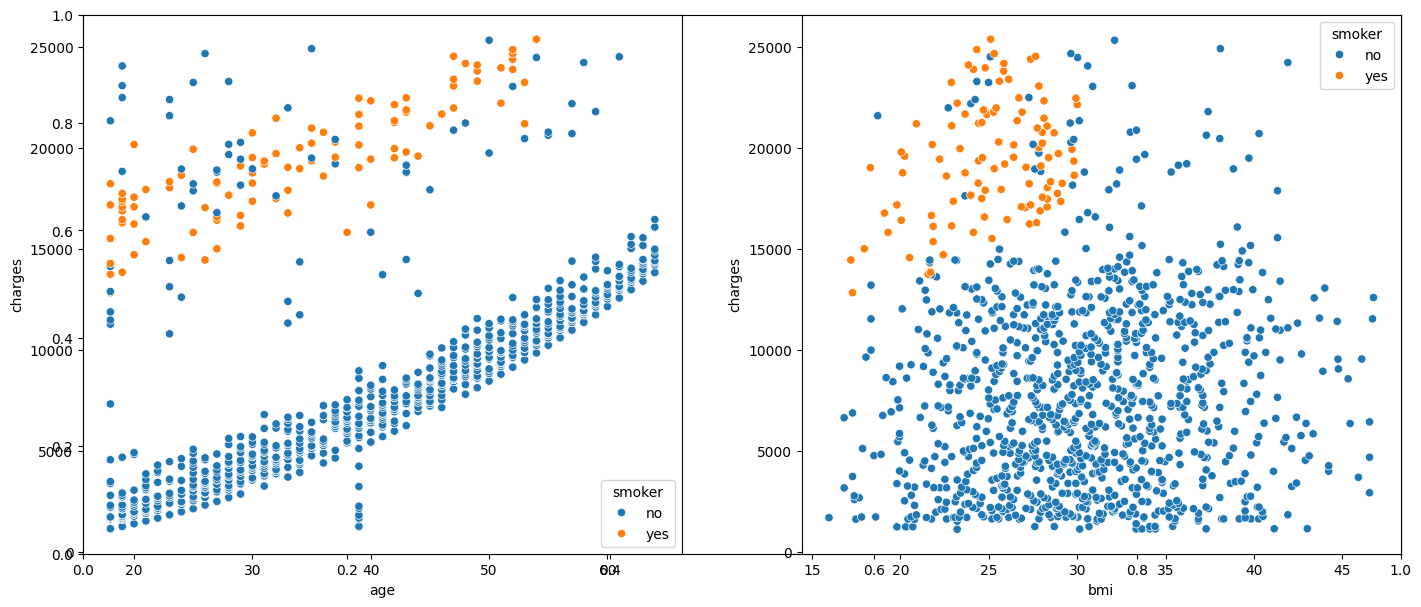

In [ ]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=data, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

Feature Engineering

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

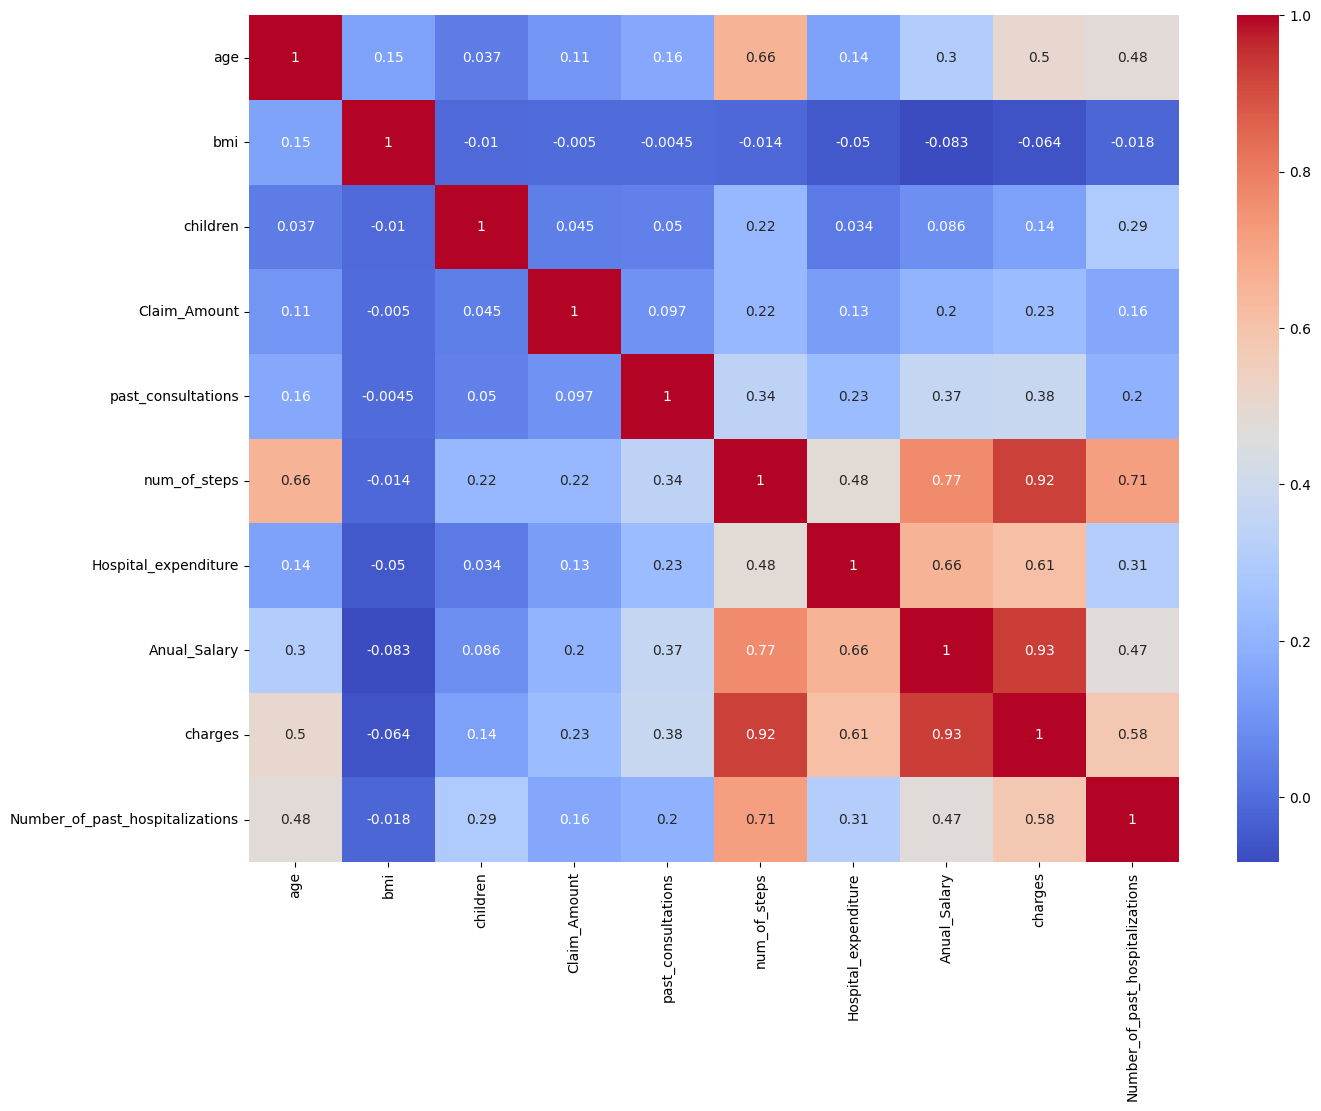

In [ ]:
plt.figure(figsize = (15,11))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Variation Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_data

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,18.647015
1,bmi,28.158271
2,children,2.041448
3,Claim_Amount,5.930926
4,past_consultations,6.716169
5,num_of_steps,60.941074
6,Hospital_expenditure,6.733394
7,Anual_Salary,25.430893
8,charges,45.192814
9,Number_of_past_hospitalizations,12.235470


In [ ]:
# Highest VIF: 60.94, so drop this column

numeric_columns = numeric_data.drop(["num_of_steps"], axis = 1)

In [ ]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,17.498113
1,bmi,13.426627
2,children,2.021241
3,Claim_Amount,5.503492
4,past_consultations,6.267850
5,Hospital_expenditure,6.485844
6,Anual_Salary,25.386873
7,charges,44.918322
8,Number_of_past_hospitalizations,11.386938


In [ ]:
# Highest VIF: 44.92, so drop this column

numeric_columns = numeric_columns.drop(["charges"], axis = 1)

In [ ]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,12.077326
1,bmi,12.354700
2,children,1.993284
3,Claim_Amount,5.477937
4,past_consultations,6.250576
5,Hospital_expenditure,6.468813
6,Anual_Salary,5.288531
7,Number_of_past_hospitalizations,11.009927


In [ ]:
# Highest VIF: 12.35, so drop this column

numeric_columns = numeric_columns.drop(["bmi"], axis = 1)

In [ ]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,9.504427
1,children,1.978257
2,Claim_Amount,4.940706
3,past_consultations,5.624491
4,Hospital_expenditure,6.015223
5,Anual_Salary,4.708461
6,Number_of_past_hospitalizations,10.903649


In [ ]:

# Highest VIF: 10.90, so drop this column

numeric_columns = numeric_columns.drop(["Number_of_past_hospitalizations"], axis = 1)

In [ ]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,6.474797
1,children,1.753334
2,Claim_Amount,4.844903
3,past_consultations,5.589438
4,Hospital_expenditure,5.939800
5,Anual_Salary,4.488043


In [ ]:
feature = list(vif_data.feature)
feature

['age',
 'children',
 'Claim_Amount',
 'past_consultations',
 'Hospital_expenditure',
 'Anual_Salary']

In [ ]:
# Fetching all the values of independent columns

input = numeric_columns[feature]
input

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,18.0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,18.0,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,18.0,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,18.0,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,18.0,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...,...
1132,26.0,4.0,47575.32907,23.0,1.899911e+07,6.848551e+08
1133,52.0,3.0,40405.58219,22.0,1.695495e+07,6.549545e+08
1135,35.0,2.0,56705.00053,19.0,1.820541e+07,6.646015e+08
1139,50.0,2.0,18311.54568,29.0,1.691774e+07,7.070238e+08


In [ ]:
# Fetching the values dependent column
target = data["charges"]
target

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1132,24671.66334
1133,24869.83680
1135,24915.04626
1139,25333.33284


Categorical Columns

In [ ]:
cat_cols = data.select_dtypes(exclude=['number'])
cat_cols

,sex,smoker,region
0,male,no,southeast
1,male,no,southeast
2,male,no,southeast
3,male,no,southeast
4,male,no,southeast
...,...,...,...
1132,female,no,northeast
1133,male,yes,northeast
1135,female,no,northeast
1139,male,no,northeast


In [ ]:
#Calculating Cramer's V

In [ ]:
from scipy.stats import chi2_contingency

# Define a function to calculate Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()

    phi2 = chi2 / n

    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))

    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
# Create contingency tables
sex_smoker = pd.crosstab(data['sex'], data['smoker'])
sex_region = pd.crosstab(data['sex'], data['region'])
smoker_region = pd.crosstab(data['smoker'], data['region'])

In [ ]:
# Calculate Cramer's V for each pair
cv_sex_smoker = cramers_v(sex_smoker)
cv_sex_region = cramers_v(sex_region)
cv_smoker_region = cramers_v(smoker_region)

In [ ]:
sex_smoker, sex_region, smoker_region

(smoker   no  yes
 sex             
 female  528   50
 male    496   52,
 region  northeast  northwest  southeast  southwest
 sex                                               
 female        144        143        146        145
 male          134        140        138        136,
 region  northeast  northwest  southeast  southwest
 smoker                                            
 no            248        257        258        261
 yes            30         26         26         20)

In [ ]:
cv_sex_smoker, cv_sex_region, cv_smoker_region

(0.0, 0.0, 0.0)

Association Matrix

In [ ]:
# Function to calculate Cramer's V for all pairs of categorical columns
def calculate_cramers_v_matrix(data, columns):
    cramers_v_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                contingency_table = pd.crosstab(data[col1], data[col2])
                cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)
            else:
                cramers_v_matrix.loc[col1, col2] = 1.0
    return cramers_v_matrix

In [ ]:
# Calculate Cramer's V matrix for the selected categorical variables
categorical_columns = ['sex', 'smoker', 'region']
cramers_v_matrix = calculate_cramers_v_matrix(data, categorical_columns)

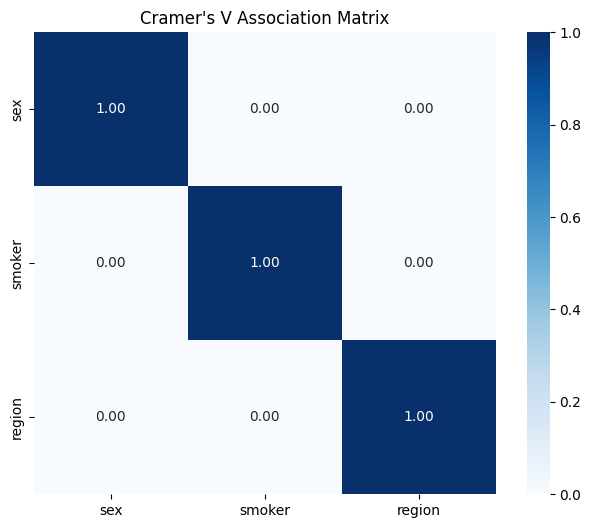

In [ ]:
# Visualize the association matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f")
plt.title("Cramer's V Association Matrix")
plt.show()

The plot represents a Cramer's V association matrix, which is used to measure the strength of association between pairs of categorical variables. In this particular plot, the association between the categorical variables sex, smoker, and region is being analyzed.

**Interpretation of the Plot**

**Diagonal Values (1.00):**

The values along the diagonal (sex vs. sex, smoker vs. smoker, region vs. region) are all 1.00. This is expected because a variable is perfectly associated with itself.
Off-diagonal Values (0.00):

The off-diagonal elements show the association between different pairs of variables:
sex vs. smoker: 0.00
sex vs. region: 0.00
smoker vs. region: 0.00
All these off-diagonal values are 0.00, indicating no association or a very weak association between these pairs of variables.

**Summary**

There is no significant association between the variables sex, smoker, and region. In practical terms, this means:
The smoking status (smoker) is not related to the sex (sex) of the individual in this dataset.
The region (region) where the individual lives does not have a significant relationship with either their smoking status (smoker) or their sex (sex).
This result suggests that these variables can be considered independent of each other in the context of this dataset, implying that one does not predict or affect the other.

In [ ]:
X = pd.concat([input,cat_cols], axis=1)
data = pd.concat([X, target], axis=1)
data.head()

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,sex,smoker,region,charges
0,18.0,0.0,29087.54313,17.0,4720920.992,55784970.05,male,no,southeast,1121.8739
1,18.0,0.0,39053.67437,7.0,4329831.676,13700885.19,male,no,southeast,1131.5066
2,18.0,0.0,39023.62759,19.0,6884860.774,73523107.27,male,no,southeast,1135.9407
3,18.0,0.0,28185.39332,11.0,4274773.550,75819679.60,male,no,southeast,1136.3994
4,18.0,0.0,14697.85941,16.0,3787293.921,23012320.01,male,no,southeast,1137.0110


In [ ]:
data.isnull().sum().sort_values(ascending = False)

,0
age,0
children,0
Claim_Amount,0
past_consultations,0
Hospital_expenditure,0
Anual_Salary,0
sex,0
smoker,0
region,0
charges,0


Build a Pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [ ]:
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

In [ ]:
numeric_cols, categorical_cols

(Index(['age', 'children', 'Claim_Amount', 'past_consultations',
        'Hospital_expenditure', 'Anual_Salary'],
       dtype='object'),
 Index(['sex', 'smoker', 'region'], dtype='object'))

In [ ]:
# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((900, 9), (226, 9), (900,), (226,))

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [ ]:
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

In [ ]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred_lr = model_lr.predict(X_test)

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)


print(f'MAE: {mae_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R-squared: {r2_lr}')

MAE: 1233.898137562013
RMSE: 1868.1072804113828
R-squared: 0.8784693052827712


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Ridge(alpha=0.1))])

In [ ]:
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', Ridge(alpha=0.1))])

In [ ]:
y_pred_ridge = model_ridge.predict(X_test)

In [ ]:
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f'MAE: {mae_ridge}')
print(f'RMSE: {rmse_ridge}')
print(f'R-squared: {r2_ridge}')

MAE: 1233.929991057884
RMSE: 1868.0762619118505
R-squared: 0.8784733410986372


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Lasso(alpha=0.1))])

In [ ]:
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', Lasso(alpha=0.1))])

In [ ]:
y_pred_lasso = model_lasso.predict(X_test)

In [ ]:
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f'MAE: {mae_lasso}')
print(f'RMSE: {rmse_lasso}')
print(f'R-squared: {r2_lasso}')

MAE: 1233.9880060020246
RMSE: 1868.1712011656302
R-squared: 0.8784609883443856


Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeRegressor())])

In [ ]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor())])

In [ ]:
y_pred_dt = model_dt.predict(X_test)

In [ ]:
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

print(f'MAE: {mae_dt}')
print(f'RMSE: {rmse_dt}')
print(f'R-squared: {r2_dt}')

MAE: 826.6746625619468
RMSE: 1967.3448519503127
R-squared: 0.8652144481958186


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])

In [ ]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f'MAE: {mae_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R-squared: {r2_rf}')

MAE: 597.4460588185839
RMSE: 1766.3930125095333
R-squared: 0.8913431699762205


XG Boost Regression

In [ ]:
from xgboost import XGBRegressor

model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', XGBRegressor())])

In [ ]:

model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='obj...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print(f'MAE: {mae_xgb}')
print(f'RMSE: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

MAE: 553.0276789623202
RMSE: 1776.3188933136755
R-squared: 0.8901185897370945


Visualizing Model Performances

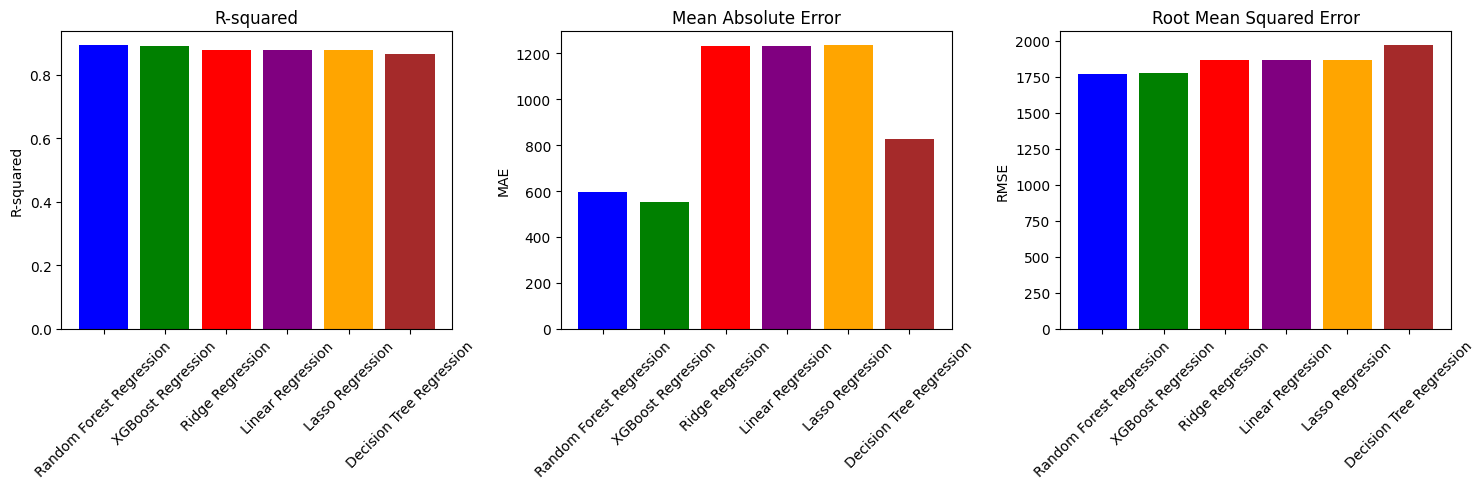

In [ ]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Decision Tree Regression', 'Random Forest Regression', 'XGBoost Regression']
r2_scores = [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_xgb]
mae_scores = [mae_lr, mae_ridge, mae_lasso, mae_dt, mae_rf, mae_xgb]
rmse_scores = [rmse_lr, rmse_ridge, rmse_lasso, rmse_dt, rmse_rf, rmse_xgb]

# Create a DataFrame for easier sorting
df_results = pd.DataFrame({'Model': models, 'R-squared': r2_scores, 'MAE': mae_scores, 'RMSE': rmse_scores})
df_results = df_results.sort_values(by='R-squared', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Plot R-squared
axes[0].bar(df_results['Model'], df_results['R-squared'], color=colors)
axes[0].set_ylabel('R-squared')
axes[0].set_title('R-squared')
axes[0].tick_params(axis='x', rotation=45)

# Plot MAE
axes[1].bar(df_results['Model'], df_results['MAE'], color=colors)
axes[1].set_ylabel('MAE')
axes[1].set_title('Mean Absolute Error')
axes[1].tick_params(axis='x', rotation=45)

# Plot RMSE
axes[2].bar(df_results['Model'], df_results['RMSE'], color=colors)
axes[2].set_ylabel('RMSE')
axes[2].set_title('Root Mean Squared Error')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The plot visualizes the performance metrics of different regression models using three key evaluation metrics: R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). Here’s a breakdown of each subplot and what it indicates:

1. R-squared Plot:

Description: R-squared, also known as the coefficient of determination, measures how well the regression model explains the variance of the dependent variable.
Interpretation:
All models seem to have high R-squared values, close to or slightly above 0.8, indicating that they all explain a substantial amount of the variance in the target variable.
XGBoost Regression and Random Forest Regression appear to have the highest R-squared values, suggesting they fit the data slightly better than the other models.
2. Mean Absolute Error (MAE) Plot:

Description: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation.
Interpretation:
The XGBoost Regression model has the lowest MAE, indicating it makes more accurate predictions on average compared to the other models.
Decision Tree Regression also shows relatively low MAE, better than Ridge Regression, Linear Regression, and Lasso Regression, which have the highest MAE values. This suggests that XGBoost and Decision Tree Regression models produce predictions that are closer to the actual values.
3. Root Mean Squared Error (RMSE) Plot:

Description: RMSE is a measure of the differences between predicted values and actual values, giving more weight to larger errors. It is the square root of the average of squared differences between prediction and actual observation.
Interpretation:
XGBoost Regression and Random Forest Regression have the lowest RMSE values, indicating they are the best models in terms of prediction accuracy and penalizing larger errors.
The Decision Tree Regression model has the highest RMSE, which indicates that although it might produce predictions with a lower average error (as seen in the MAE plot), it still makes some predictions with large errors, leading to a higher RMSE.
Summary

Best Models: XGBoost Regression and Random Forest Regression consistently perform well across all three metrics (high R-squared, low MAE, low RMSE), indicating they are the most accurate and reliable models for this dataset.
Other Models: Ridge, Linear, and Lasso Regression show similar performance, with high MAE and RMSE values, suggesting less accuracy compared to XGBoost and Random Forest. Decision Tree Regression, despite having low MAE, has a high RMSE, suggesting it may have significant prediction errors in some cases.
These plots provide a comprehensive overview of how each regression model performs, helping to identify which models provide the most accurate and reliable predictions for the given data.

Hyperparameter Tuning

In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


Define the Objective Function

In [ ]:
import optuna

def objective(trial):
    if trial.suggest_categorical('model', ['XGBoost', 'RandomForest', 'DecisionTree']):
      # XGBoost
      n_estimators = trial.suggest_int('n_estimators', 100, 1000)
      max_depth = trial.suggest_int('max_depth', 3, 10)
      learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
      subsample = trial.suggest_float('subsample', 0.5, 1.0)
      colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

      model = XGBRegressor(
          n_estimators=n_estimators,
          max_depth=max_depth,
          learning_rate=learning_rate,
          subsample=subsample,
          colsample_bytree=colsample_bytree,
          random_state=0
      )

    elif trial.suggest_categorical('model', ['XGBoost', 'RandomForest', 'DecisionTree']):
      # Random Forest
      n_estimators = trial.suggest_int('n_estimators', 100, 1000)
      max_depth = trial.suggest_int('max_depth', 3, 10)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

      model = RandomForestRegressor(
          n_estimators=n_estimators,
          max_depth=max_depth,
          min_samples_split=min_samples_split,
          min_samples_leaf=min_samples_leaf,
          random_state=0
      )

    else:
      # Decision Tree
      max_depth = trial.suggest_int('max_depth', 3, 10)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

      model = DecisionTreeRegressor(
          max_depth=max_depth,
          min_samples_split=min_samples_split,
          min_samples_leaf=min_samples_leaf,
          random_state=0
      )

    # Create pipeline with preprocessor
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', model)])

    # Fit and evaluate
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    #rmse = mean_squared_error(y_test, y_pred)

    return r2

Optimizing the Hyperparameters

In [ ]:
# Create Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-11-29 14:30:35,708] A new study created in memory with name: no-name-d3c0bcd9-226d-439d-b418-6a260685836b
[I 2024-11-29 14:30:39,489] Trial 0 finished with value: 0.9184177020213699 and parameters: {'model': 'DecisionTree', 'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.021941078503780905, 'subsample': 0.5170672062757555, 'colsample_bytree': 0.5821626197245791}. Best is trial 0 with value: 0.9184177020213699.
[I 2024-11-29 14:30:40,225] Trial 1 finished with value: 0.9089186668812416 and parameters: {'model': 'XGBoost', 'n_estimators': 746, 'max_depth': 3, 'learning_rate': 0.015638140179317063, 'subsample': 0.5901876847494756, 'colsample_bytree': 0.5143836627530401}. Best is trial 0 with value: 0.9184177020213699.
[I 2024-11-29 14:30:41,226] Trial 2 finished with value: 0.9097121221541214 and parameters: {'model': 'DecisionTree', 'n_estimators': 639, 'max_depth': 3, 'learning_rate': 0.12232711790668806, 'subsample': 0.7425541376436766, 'colsample_bytree': 0.54954673034

Best Model & Best Values

In [ ]:
# Print best parameters and score
print('Best parameters:', study.best_params)
print('Best R-squared:', study.best_value)

Best parameters: {'model': 'XGBoost', 'n_estimators': 944, 'max_depth': 10, 'learning_rate': 0.04309459902690677, 'subsample': 0.9244121768089726, 'colsample_bytree': 0.6164178786054322}
Best R-squared: 0.9263572962097262


In [ ]:
best_model_name = study.best_params.pop('model', None)

if best_model_name:
    if best_model_name == 'XGBoost':
        model = XGBRegressor(**{key: value for key, value in study.best_params.items() if key != 'model'}, random_state=0)
    elif best_model_name == 'RandomForest':
        model = RandomForestRegressor(**{key: value for key, value in study.best_params.items() if key != 'model'}, random_state=0)
    elif best_model_name == 'DecisionTree':
        model = DecisionTreeRegressor(**{key: value for key, value in study.best_params.items() if key != 'model'}, random_state=0)
    else:
        print(f"Unknown model name: {best_model_name}")
        model = None

    if model:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', model)])
        pipeline.fit(X_train, y_train)

        print(f"Best model ({best_model_name}) fitted with parameters: {study.best_params}")
else:
  print("No best model found in the study results.")

Best model (XGBoost) fitted with parameters: {'model': 'XGBoost', 'n_estimators': 944, 'max_depth': 10, 'learning_rate': 0.04309459902690677, 'subsample': 0.9244121768089726, 'colsample_bytree': 0.6164178786054322}


In [ ]:
y_pred_best = pipeline.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)

print(f'MAE: {mae_best}')
print(f'RMSE: {rmse_best}')
print(f'R-squared: {r2_best}')

MAE: 837.1481840388896
RMSE: 1454.1984766002968
R-squared: 0.9263572962097262


Saving the Best Model

In [ ]:
import joblib

joblib.dump(pipeline, 'best_insurance_model.pkl')

['best_insurance_model.pkl']

Feature Importance from the Best Model

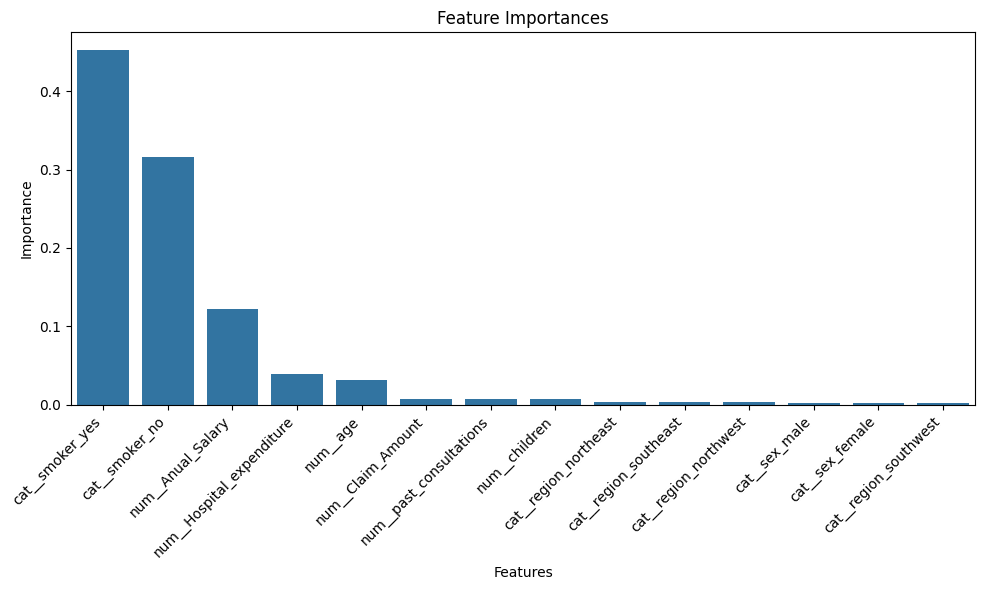

In [ ]:
if best_model_name == 'XGBoost':
    importances = pipeline.named_steps['regressor'].feature_importances_

    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
    df_importances = df_importances.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(y='importance', x='feature', data=df_importances)
    plt.title('Feature Importances')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

This plot illustrates the importance of various features used in a machine learning model, a tree-based model like XGBoost. The feature importance values indicate how much each feature contributes to the predictions made by the model.

Explanation of the Plot:

Y-axis (Importance): This axis represents the importance score of each feature. The importance score is a measure of how much each feature contributes to the prediction. Higher values indicate more significant influence on the model's predictions.

X-axis (Features): The features listed along this axis represent the different variables used as input in the machine learning model. They are categorized as follows:

Categorical Features:

cat__smoker_yes and cat__smoker_no: These indicate whether the individual is a smoker or not, respectively.
cat__region_*: These features represent different regions, such as northeast, northwest, southeast, and southwest.
cat__sex_male and cat__sex_female: These features represent the gender of the individual.
Numerical Features:

num__Annual_Salary: Represents the annual salary of the individual.
num__age: Indicates the age of the individual.
num__Hospital_expenditure: This might represent the expenditure on hospital visits or treatments.
num__children: The number of children the individual has.
num__Claim_Amount: Represents the amount claimed.
num__past_consultations: The number of past consultations.
Key Insights from the Plot

Smoking Status (cat__smoker_yes and cat__smoker_no): These features have the highest importance scores, suggesting that whether an individual is a smoker or not is the most significant factor in predicting insurance charges. Smokers generally have higher health risks, which leads to higher insurance premiums.

Annual Salary (num__Annual_Salary): This feature is the second most important, indicating that the individual's income level plays a crucial role in determining the insurance charges. Higher salaries might correlate with higher charges or better plans.

Age (num__age) and Hospital Expenditure (num__Hospital_expenditure): These features also have noticeable importance. Age is often linked to health risks, which can influence insurance costs, while past hospital expenditure might indicate existing health issues.

Less Important Features: Variables such as the number of children, claim amount, and the specific region or sex of the individual show relatively low importance. This suggests that these factors do not significantly impact the prediction of insurance charges in the model.

Summary

The plot indicates that smoking status, annual salary, age, and hospital expenditure are the most influential factors in predicting insurance charges. This aligns with typical industry practices where lifestyle choices (like smoking), income, and health-related factors heavily influence insurance pricing. Understanding these feature importances can help insurance companies tailor their policies more effectively and target high-risk individuals with appropriate premiums.

Model Interpretation with Shapley Values

In [ ]:
! pip install shap

In [ ]:
import shap
import xgboost

In [ ]:
for col in ['sex', 'smoker', 'region']:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].astype('category')

In [ ]:
X_test_encoded = pd.get_dummies(X_test, columns=['sex', 'smoker', 'region'])

In [ ]:
explainer = shap.Explainer(pipeline.named_steps['regressor'])

In [ ]:
shap_values = explainer(xgboost.DMatrix(X_test_encoded))

Plotting the Values

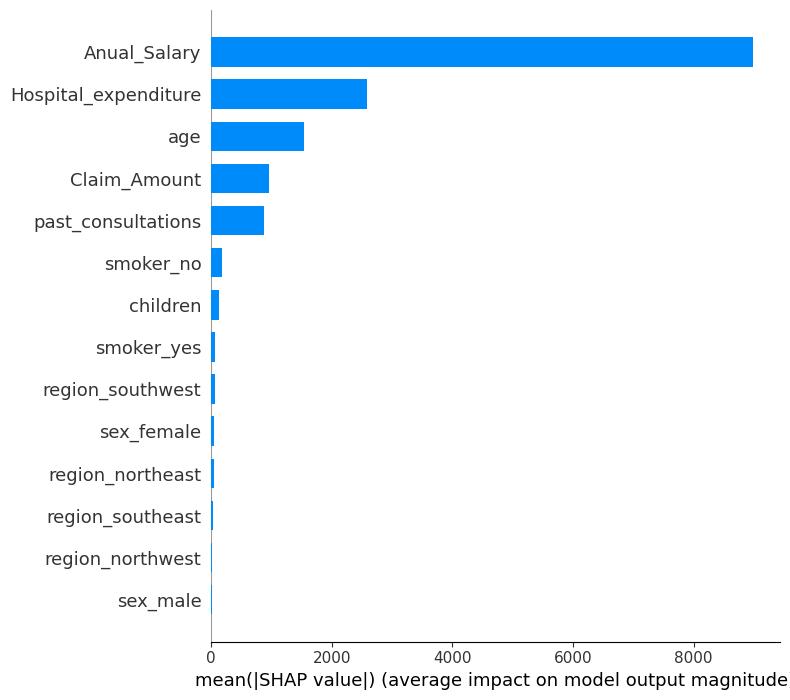

In [ ]:
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

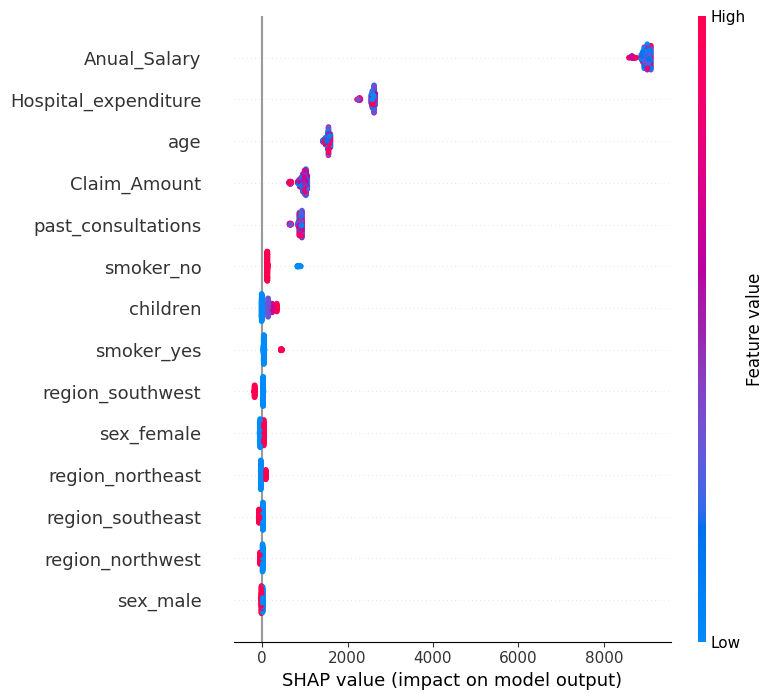

In [ ]:
shap.summary_plot(shap_values, X_test_encoded)